In [167]:
#Importing required laibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [35]:
# Importing the data and creating dataframe
rainfall_data=pd.read_csv('Rainfall.csv')

In [37]:
rainfall_data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [39]:
rainfall_data.shape

(366, 12)

In [41]:
# getting the information of the data like columns,datatypes,null values and rows
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [43]:
# removing unwanted white spaces from colum name 
rainfall_data.columns=rainfall_data.columns.str.strip()

In [45]:
# droping the unwanted columns
rainfall_data.drop(columns=('day'),inplace=True)

In [47]:
rainfall_data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [49]:
# checking the missing values in all the fileds
rainfall_data.isna().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [51]:
# replacing the values in winddirection and windspeed colun with mode and median
rainfall_data['winddirection']=rainfall_data['winddirection'].fillna(rainfall_data['winddirection'].mode()[0])
rainfall_data['windspeed']=rainfall_data['windspeed'].fillna(rainfall_data['windspeed'].median())

In [53]:
rainfall_data.isna().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [55]:
# checking the distinct values in rainfall column and there counts
rainfall_data['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [57]:
# replacing the values in rainfall column to 0 and 1 
rainfall_data['rainfall']=rainfall_data['rainfall'].replace({'yes':1,'no':0})

C:\Users\Dell\AppData\Local\Temp\ipykernel_10228\1667588523.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rainfall_data['rainfall']=rainfall_data['rainfall'].replace({'yes':1,'no':0})


In [59]:
rainfall_data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [61]:
#checking for values got replace coreecrtly
rainfall_data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [63]:
rainfall_data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [67]:
rainfall_data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

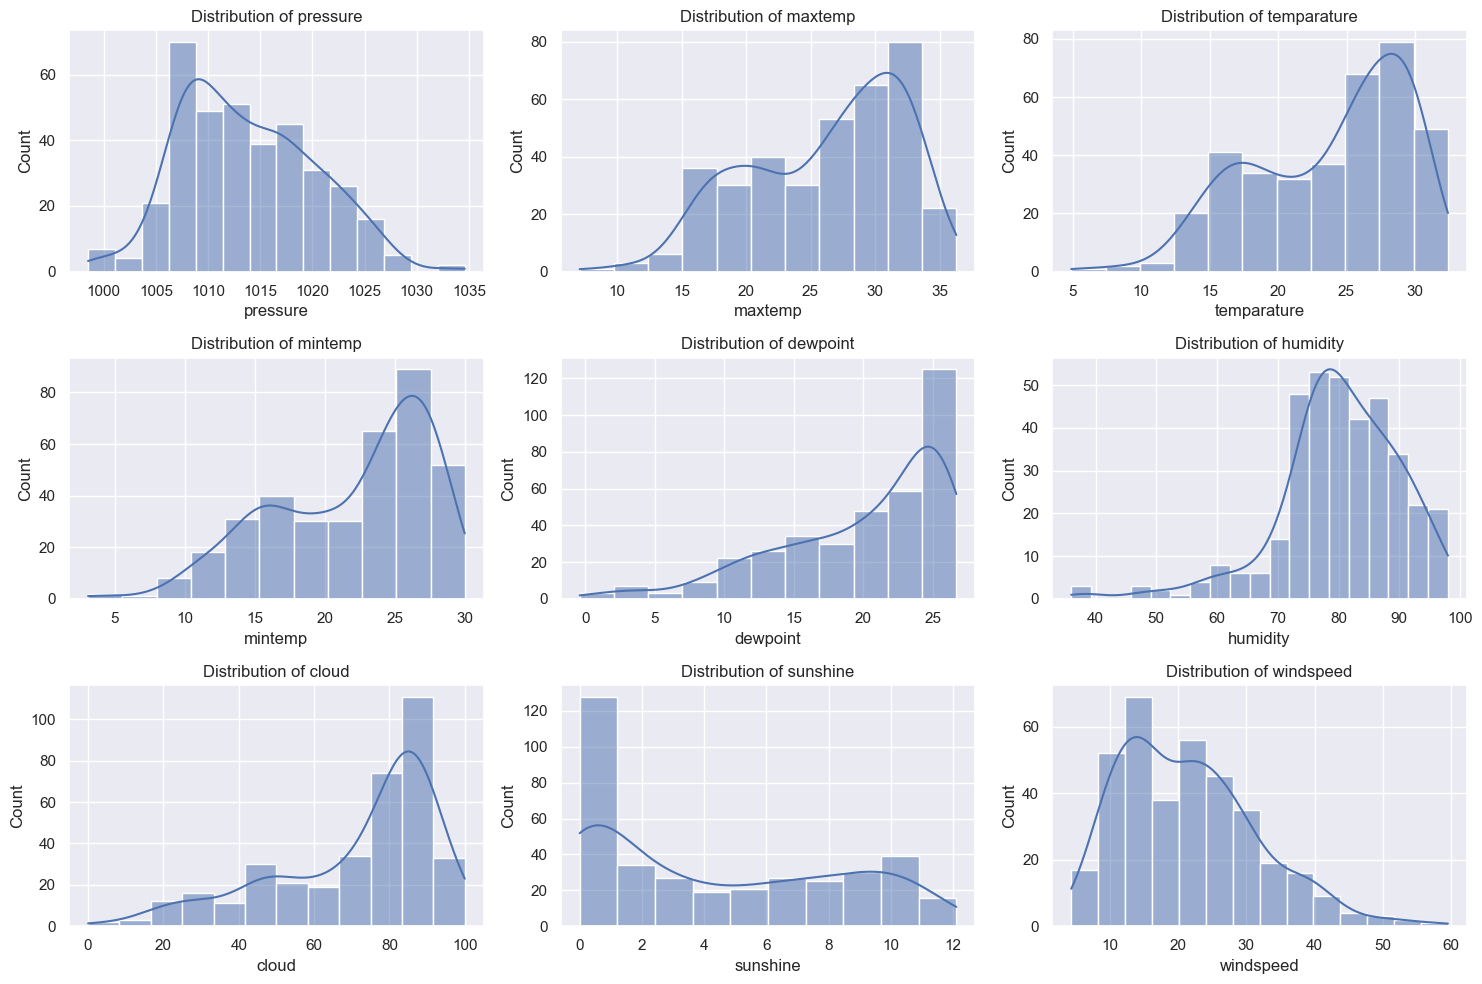

In [103]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,10))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud','sunshine','windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(rainfall_data[column],kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()  ## to ensure the proper spacing
plt.show()

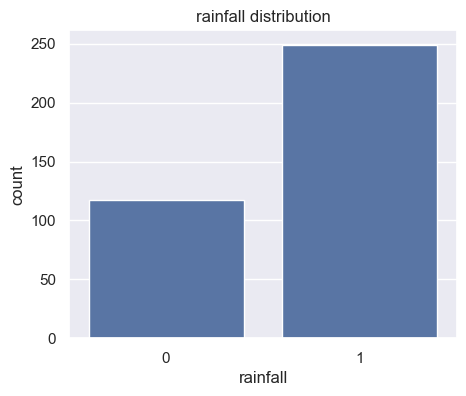

In [111]:
# checkig the data distribution in target variable catogoris to check the data is balnce or not
plt.figure(figsize=(5,4))
sns.countplot(x='rainfall',data=rainfall_data)
plt.title('rainfall distribution')
plt.show()

In [113]:
# checking the corelations of target and fileds
corelation=rainfall_data.corr()

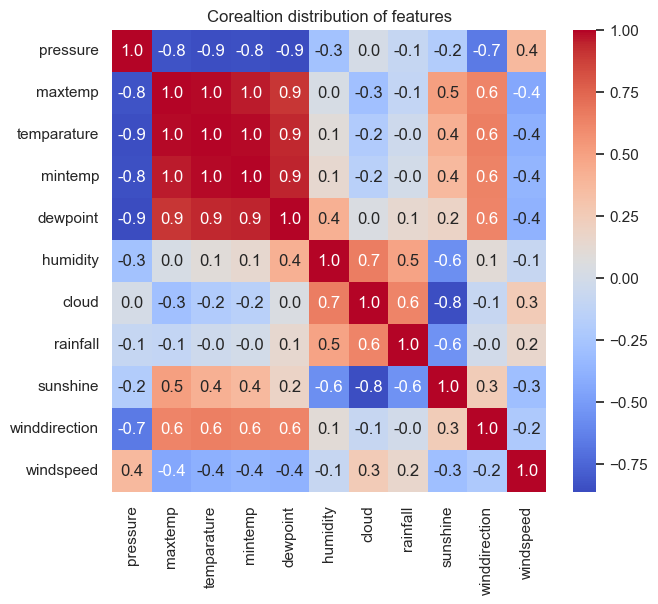

In [133]:
plt.figure(figsize=(7,6))
sns.heatmap(data=corelation,cbar=True,annot=True,fmt='.1f',cmap='coolwarm')
plt.title('Corealtion distribution of features')
plt.show()

In [141]:
# droping the maxtemprature,teamprature and min temprature due to multicolinearity
rainfall_data=rainfall_data.drop(columns=['maxtemp','temparature','mintemp'])

In [145]:
rainfall_data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [161]:
## as the data is imbalce so we need to perform down sampling on the data
majority_data=rainfall_data.loc[rainfall_data['rainfall'] == 1]
minority_data=rainfall_data.loc[rainfall_data['rainfall'] == 0]

In [165]:
print(majority_data.shape)
print(minority_data.shape)

(249, 8)
(117, 8)


In [173]:
# performing the down sampling on data by taking the sample equal to minority data
majority_downsample= resample(majority_data,replace=False,n_samples=len(minority_data),random_state=42)

In [177]:
majority_downsample.shape


(117, 8)

In [179]:
new_data=pd.concat([majority_downsample,minority_data])

In [183]:
new_data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [185]:
# checking the new data is balanced or not
new_data['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [187]:
# splitting the new data into target and features
x=new_data.drop(columns=('rainfall'))
y=new_data['rainfall']

In [189]:
x

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,10.5,270.0,11.3
9,1017.5,15.5,85,91,0.0,70.0,37.7
137,1012.3,20.1,80,86,0.3,80.0,39.5
89,1018.3,16.3,79,89,2.4,40.0,14.8
157,1008.8,24.7,91,80,2.2,20.0,11.2
...,...,...,...,...,...,...,...
351,1025.9,-0.4,39,25,9.1,20.0,35.6
352,1026.4,3.1,48,11,9.5,40.0,25.2
353,1025.4,8.7,62,71,2.1,30.0,29.0
360,1020.6,13.3,74,87,0.6,30.0,21.6


In [191]:
y

188    1
9      1
137    1
89     1
157    1
      ..
351    0
352    0
353    0
360    0
365    0
Name: rainfall, Length: 234, dtype: int64

In [193]:
# train test spliting the data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Random forest clssifier model initialization

In [195]:
rf_model=RandomForestClassifier()

In [227]:
param_grod={'criterion':['gini','Entrophy'],
           'n_estimators':[50,100,200,400],
           'max_features':['sqrt','log2'],
           'max_depth':[10,20,30,40],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4,5]}

In [229]:
# Hyperparameter tunning using gridsearch cv
grid_model=GridSearchCV(estimator=rf_model,param_grid=param_grod,cv=5,verbose=2)

In [231]:
grid_model.fit(X_train,Y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

C:\Newfolder\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1920 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Newfolder\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Newfolder\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Newfolder\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Newfolder\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valid

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'Entrophy'],
                         'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 400]},
             verbose=2)

In [233]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [235]:
# taking the model predictions
y_pred=grid_model.predict(X_test)

In [274]:
# checking the model accuracy
test_accu=accuracy_score(Y_test,y_pred)
print('Random forest classifire model accuracy will be =',test_accu*100)

Random forest classifire model accuracy will be = 76.59574468085107


In [239]:
conf_matr=confusion_matrix(Y_test,y_pred)
conf_matr

array([[21,  5],
       [ 6, 15]], dtype=int64)

In [243]:
clss_report=classification_report(Y_test,y_pred)
print(clss_report)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.75      0.71      0.73        21

    accuracy                           0.77        47
   macro avg       0.76      0.76      0.76        47
weighted avg       0.77      0.77      0.77        47



In [247]:
new_data.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [255]:
#model predictions on unknown data
input_data=[1015.9,19.9,95,81,0.0,40.0,13.7]
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud','sunshine',
       'winddirection', 'windspeed'])

In [259]:
model_prediction=grid_model.predict(input_df)
print(model_prediction)

[1]


## Logesticregreesion model


In [262]:
log_model=LogisticRegression()

In [264]:
log_model.fit(X_train,Y_train)


LogisticRegression()

In [266]:
y_log_pre=log_model.predict(X_test)
y_log_pre

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [272]:
log_model_accu=accuracy_score(y_log_pre,Y_test)
print('Logestic regression model aacuracy will be =',log_model_accu*100)

Logestic regression model aacuracy will be = 76.59574468085107
